## Use GridSearchCV and select the best hyperparamter for Support Vector machine, DecisionTreeClassifier, RandomForest Classifier

In [122]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('Advertising_data.csv')

In [123]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [124]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [125]:
dataset = pd.get_dummies(dataset,columns=['Gender'])

In [126]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19.0,19000.0,0,0,1
1,15810944,35.0,20000.0,0,0,1
2,15668575,26.0,43000.0,0,1,0
3,15603246,27.0,57000.0,0,1,0
4,15804002,19.0,76000.0,0,0,1
...,...,...,...,...,...,...
395,15691863,46.0,41000.0,1,1,0
396,15706071,51.0,23000.0,1,0,1
397,15654296,50.0,20000.0,1,1,0
398,15755018,36.0,33000.0,0,0,1


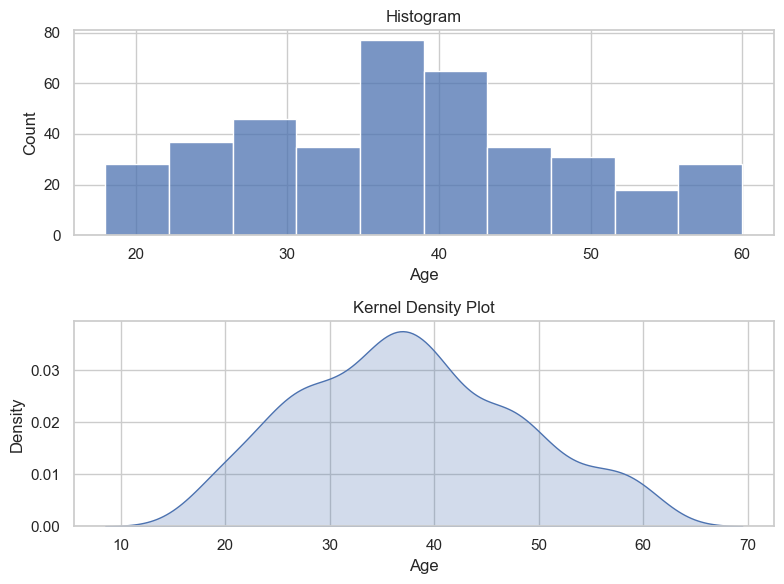

In [127]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'data' is your dataset or a specific column
sns.set(style="whitegrid")  # Set the style of the plot
plt.figure(figsize=(8, 6))  # Set the size of the plot

# Histogram plot
plt.subplot(2, 1, 1)  # Create the first subplot
sns.histplot(dataset['Age'], kde=False)  # Plot the histogram
plt.title('Histogram')  # Set the title for the subplot

# Kernel density plot
plt.subplot(2, 1, 2)  # Create the second subplot
sns.kdeplot(dataset['Age'], shade=True)  # Plot the kernel density plot
plt.title('Kernel Density Plot')  # Set the title for the subplot

plt.tight_layout()  # Adjust the spacing between subplots
plt.show()  # Display the plot


In [128]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
data_to_scale = dataset[['Age','EstimatedSalary']]

In [129]:
data_to_scale

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [130]:
data_to_scale = SS.fit_transform(data_to_scale)

In [131]:
data_to_scale = pd.DataFrame(data_to_scale,columns=['Age',"EstimatedSalary"])

In [132]:
data_to_scale

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751
...,...,...
395,0.797057,-0.844019
396,1.274623,-1.372587
397,1.179110,-1.460681
398,-0.158074,-1.078938


In [133]:
dataset = dataset.drop(['Age','EstimatedSalary'],axis=1)

In [134]:
dataset = pd.concat([dataset,data_to_scale],axis=1)

In [135]:
dataset

,User ID,Purchased,Gender_Female,Gender_Male,Age,EstimatedSalary
0,15624510,0,0,1,-1.781797,-1.490046
1,15810944,0,0,1,-0.253587,-1.460681
2,15668575,0,1,0,-1.113206,-0.785290
3,15603246,0,1,0,-1.017692,-0.374182
4,15804002,0,0,1,-1.781797,0.183751
...,...,...,...,...,...,...
395,15691863,1,1,0,0.797057,-0.844019
396,15706071,1,0,1,1.274623,-1.372587
397,15654296,1,1,0,1.179110,-1.460681
398,15755018,0,0,1,-0.158074,-1.078938


In [136]:
dataset.corr()

,User ID,Purchased,Gender_Female,Gender_Male,Age,EstimatedSalary
User ID,1.000000,0.007120,0.025249,-0.025249,-0.000721,0.071097
Purchased,0.007120,1.000000,0.042469,-0.042469,0.622454,0.362083
Gender_Female,0.025249,0.042469,1.000000,-1.000000,0.073741,0.060435
Gender_Male,-0.025249,-0.042469,-1.000000,1.000000,-0.073741,-0.060435
Age,-0.000721,0.622454,0.073741,-0.073741,1.000000,0.155238
EstimatedSalary,0.071097,0.362083,0.060435,-0.060435,0.155238,1.000000


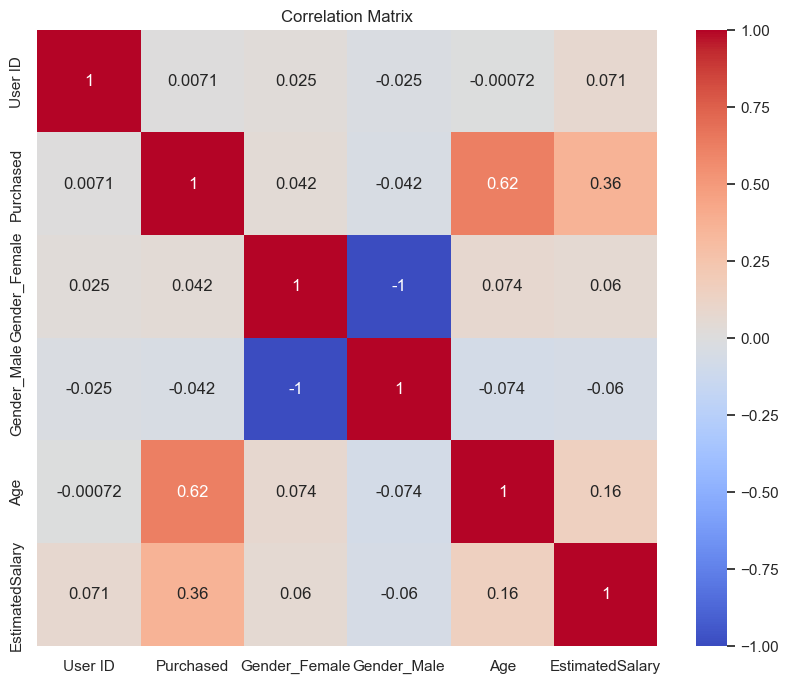

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt


correlation_matrix = dataset.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [139]:
dataset = dataset.drop(columns=['User ID'],axis = 1)

In [140]:
dataset

,Purchased,Gender_Female,Gender_Male,Age,EstimatedSalary
0,0,0,1,-1.781797,-1.490046
1,0,0,1,-0.253587,-1.460681
2,0,1,0,-1.113206,-0.785290
3,0,1,0,-1.017692,-0.374182
4,0,0,1,-1.781797,0.183751
...,...,...,...,...,...
395,1,1,0,0.797057,-0.844019
396,1,0,1,1.274623,-1.372587
397,1,1,0,1.179110,-1.460681
398,0,0,1,-0.158074,-1.078938


In [156]:
# data spliting
from sklearn.model_selection import train_test_split
x=dataset.iloc[:,-4:]
y = dataset.iloc[:,0]

In [163]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=40,test_size=30)

In [171]:
x_train.shape

(370, 4)

## Model selection

1.Support vector Classifier
2. Decision Tree Classifier
3. Random Forest


1) Support Vector Classifier

In [167]:
from sklearn.svm import SVC

In [172]:
svc=SVC()

In [189]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV


param_grid = {
    'C': [0.1, 1, 10,100,1000],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
}



grid_search = GridSearchCV(estimator = svc,
                           param_grid = param_grid,
                           cv = 100)
                           

grid_search = grid_search.fit(x_train, y_train)

In [190]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'C': 10, 'gamma': 0.4, 'kernel': 'rbf'}
Accuracy: 0.9


## 2) Decision Tree Classifier

In [192]:
from sklearn.tree import DecisionTreeClassifier 

In [193]:
tree_classifier = DecisionTreeClassifier()

In [195]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


grid_search = GridSearchCV(estimator=tree_classifier,
                          param_grid=param_grid,
                          cv=10)

In [196]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [198]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate the accuracy of the best model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy: 0.9


## 3) RANDOM FOREST CLASSIFIER

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
random_forest_classifier = RandomForestClassifier()

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [204]:
gridSearchCV = GridSearchCV(estimator=random_forest_classifier,
                           param_grid=param_grid,
                           cv=10)

gridSearchCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [210]:
best_param = gridSearchCV.best_params_
best_param

{'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 100}

In [211]:
best_model = gridSearchCV.best_estimator_
y_pred = best_model.predict(x_test)

In [212]:
from sklearn.metrics import accuracy_score

In [213]:
accuracy_score(y_pred,y_test)

0.9

# Conclusion

Based on the accuracy scores obtained from the three classifiers (Decision Tree Classifier, Random Forest Classifier, and Support Vector Classifier) with values of 0.9 for each, we can conclude that all three classifiers perform equally well on the given dataset. The accuracy scores suggest that all classifiers are able to make accurate predictions with a similar level of performance.